# Mobile Price Classification FInal Project

Dataset URL : https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?select=train.csv

Data Description:
- `battery_power`<code>&nbsp;</code>: Total energy a battery can store in one time measured in mAh
- `blue`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: Has bluetooth or not
- `clock_speed`<code>&nbsp;&nbsp;&nbsp;</code>: Speed at which microprocessor executes instructions
- `dual_sim`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: Has dual sim support or not
- `fc`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: Front Camera mega pixels
- `four_g`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: Has 4G or not
- `int_memory`<code>&nbsp;&nbsp;&nbsp;&nbsp;</code>: Internal Memory in Gigabytes
- `m_dep`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: Mobile Depth in cm
- `mobile_wt`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: Weight of mobile phone
- `n_cores`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: Number of cores of processor
- `pc`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: Primary Camera mega pixels
- `px_height`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: Pixel Resolution Height
- `px_width`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: Pixel Resolution Width
- `ram`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: Random Access Memory in Megabytes
- `sc_h`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: Screen Height of mobile in cm
- `sc_w`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: Screen Width of mobile in cm
- `talk_time`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: longest time that a single battery charge will last when you are
- `three_g`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: Has 3G or not
- `touch_screen`<code>&nbsp;&nbsp;</code>: Has touch screen or not
- `wifi`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: Has wifi or not
- `price_range`<code>&nbsp;&nbsp;&nbsp;</code>: This is the target variable with value of 0 (low cost), 1 (medium cost), 2 (high cost) and 3 (very high cost). `(Target Variable)`

### Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Dataframe Initialization

In [3]:
df = pd.read_csv('train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Exploratory Data Analysis (EDA)

### Data Cleaning

In [4]:
# Check for missing values
df.isnull().any()

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool

In [5]:
# Check for duplicate values
df.duplicated().any()

False

In [6]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


<AxesSubplot:>

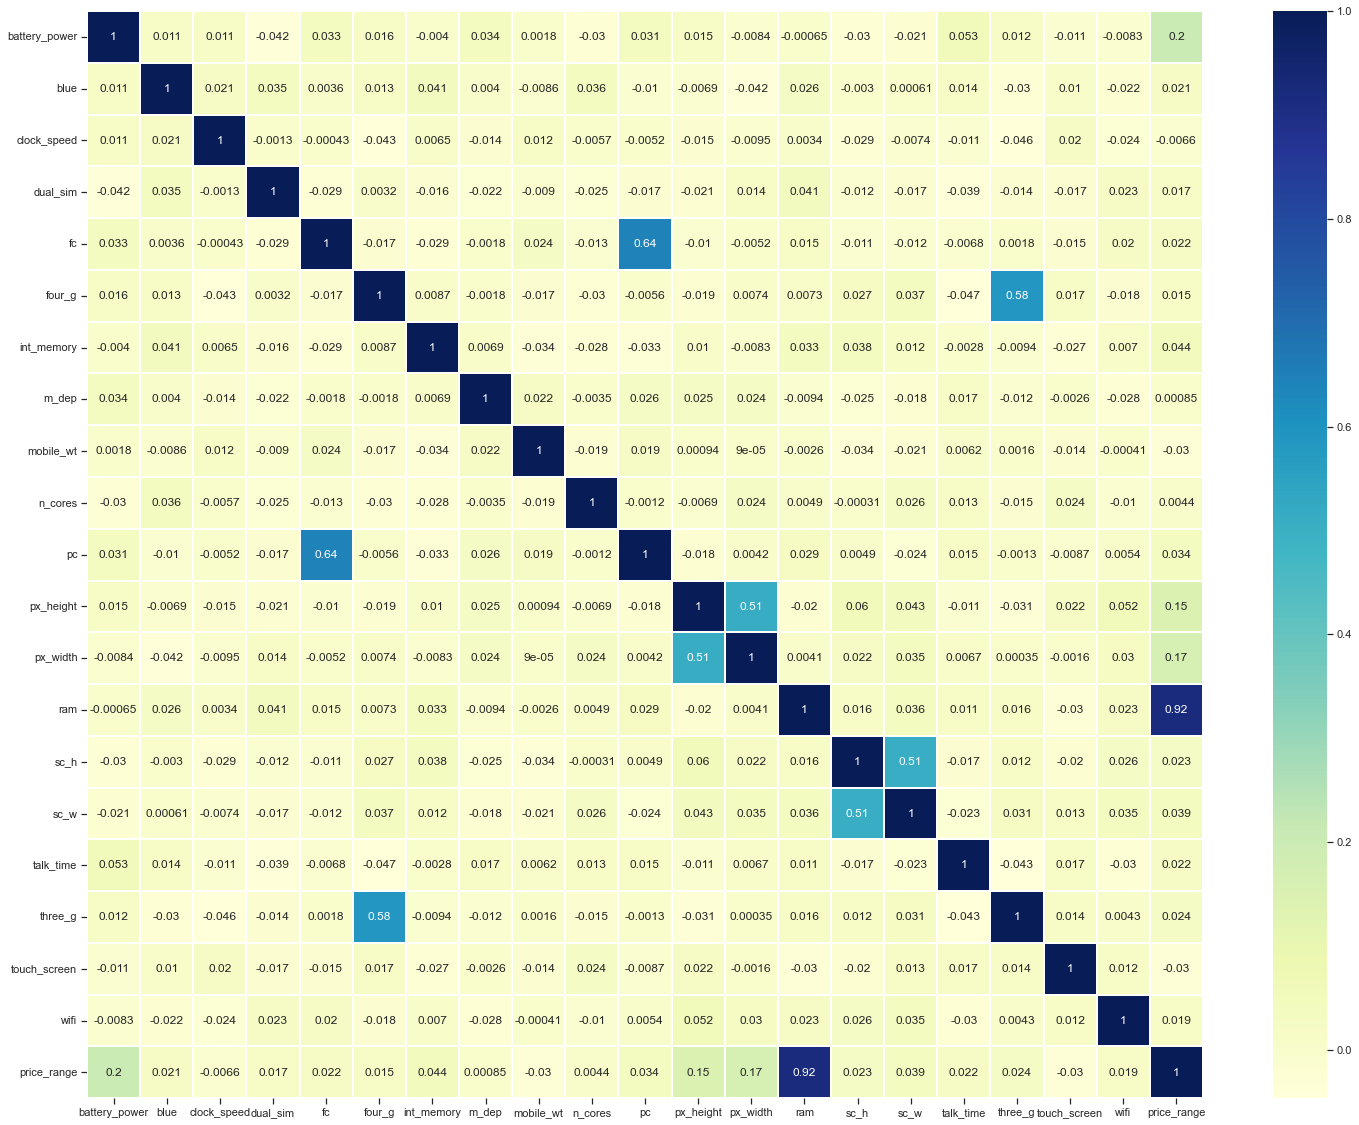

In [16]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', linewidths=0.2)


In [24]:
cor_target = abs(df.corr()['price_range'])
cor_target[cor_target > 0.1]

battery_power    0.200723
px_height        0.148858
px_width         0.165818
ram              0.917046
price_range      1.000000
Name: price_range, dtype: float64

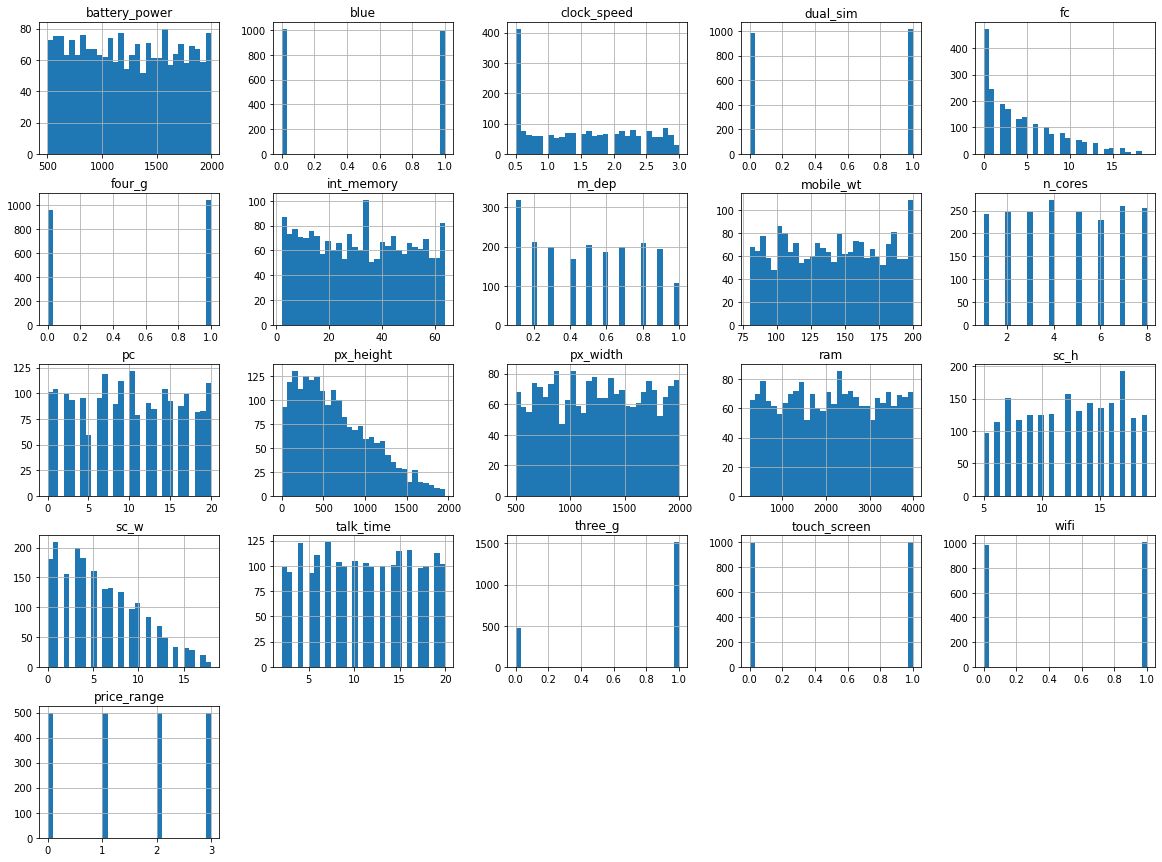

In [8]:
df.hist(figsize=(20,15), bins=30)
plt.show()

In [9]:
df[(np.abs(stats.zscore(df['fc'])) >= 3)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
95,1137,1,1.0,0,18,0,7,1.0,196,3,...,942,1179,3616,13,5,12,1,1,1,3
226,1708,1,2.4,1,18,1,49,0.1,109,1,...,233,517,3388,6,4,16,1,1,1,3
305,1348,0,2.0,0,18,0,52,0.3,98,3,...,1869,1942,955,18,11,7,1,1,1,1
1387,1533,1,1.1,1,18,1,17,0.3,160,4,...,1054,1393,2520,8,2,11,1,0,1,2
1406,1731,1,2.3,1,18,0,60,0.5,171,4,...,142,1039,1220,9,3,20,0,1,0,1
1416,1448,0,0.5,1,18,0,2,0.2,100,5,...,846,1144,593,9,4,18,1,1,1,0
1554,1957,0,1.2,1,18,1,36,0.8,151,2,...,1194,1727,1115,16,2,18,1,0,1,1
1693,695,0,0.5,0,18,1,12,0.6,196,2,...,1649,1829,2855,16,13,7,1,1,1,2
1705,1290,1,1.4,1,19,1,35,0.3,110,4,...,405,742,879,16,2,8,1,0,0,0
1880,1720,0,1.6,0,18,1,2,0.8,188,5,...,334,896,2522,10,5,2,1,0,1,2


In [10]:
# Function to check and remove outliers
def outliersIqr(data):
    q_1, q_3 = np.percentile(data, [25, 75])
    iqr = q_3 - q_1
    fLow = q_1 - (1.5 * iqr)
    fHigh = q_3 + (1.5 * iqr)
    outliers = data[((data < (fLow)) | (data > (fHigh)))]
    return outliers

def cleanData(data):
    q_1, q_3 = np.percentile(data, [25, 75])
    iqr = q_3 - q_1
    fLow = q_1 - (1.5 * iqr)
    fHigh = q_3 + (1.5 * iqr)
    clean = df.loc[(data >= fLow) & (data <= fHigh)]
    return clean


In [11]:
out = outliersIqr(df['fc'])
print('number of outliers: '+ str(len(out)))
print('max outlier value: '+ str(out.max()))
print('min outlier value: '+ str(out.min()))

number of outliers: 18
max outlier value: 19
min outlier value: 17


In [12]:
df_clean = cleanData(df['fc'])
df_clean

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [13]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

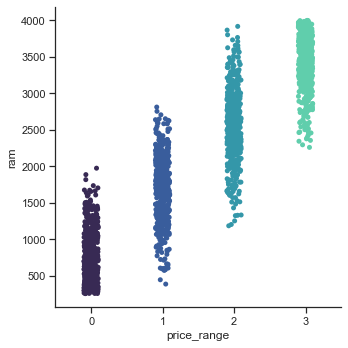

In [14]:
# 
sns.set_theme(style='ticks')
ax = sns.catplot(x='price_range', y='ram', data=df, palette='mako')